In [1]:
import numpy as np
import json
import os
import pandas as pd
import matplotlib.pyplot as plt
from bluepysnap import Circuit
from bluepysnap.bbp import Cell

CircuitPath = 'O1_data_physiology/' # edges files not inclued in https://github.com/FernandoSBorges/
circuit_path = CircuitPath + 'circuit_config.json'
circuit = Circuit(circuit_path)
cells = circuit.nodes["S1nonbarrel_neurons"]
nodesinfo = cells.get()

# NetPyNE

In [2]:
from netpyne import specs, sim   

# Network parameters
netParams = specs.NetParams()  # object of class NetParams to store the network parameters

In [3]:
cellName_list = {}
cellName_list2 = []
gid_list = {}

Epops = []
Ipops = []

cellName_list2 = []

for gid in [108767, 141766, 138433, 139867, 141213, 141369, 133426, 135956,  137858, 114264, 114284, 115007]: 
# for gid in [108767, 141766, 138433, 141213, 133426, 135956,  137858, 114264]: 

    cellName = nodesinfo['mtype'][gid] + '_' + nodesinfo['etype'][gid]
        
    cellName_list2.append(cellName)
    
    cellName_list[gid] = cellName + '_' + str(len(cellName_list2)-1)
    gid_list[cellName + '_' + str(len(cellName_list2)-1)] = gid
    
    print('%s %s %s 1 1 %d' % (cellName + '_' + str(len(cellName_list2)-1),nodesinfo['mtype'][gid],nodesinfo['etype'][gid],gid))

    if 'cADpyr' in cellName:
        Epops.append(cellName + '_' + str(len(cellName_list2)-1))
    else:
        Ipops.append(cellName + '_' + str(len(cellName_list2)-1))

L4_BP_cNAC_0 L4_BP cNAC 1 1 108767
L4_BTC_cNAC_1 L4_BTC cNAC 1 1 141766
L4_NBC_cNAC_2 L4_NBC cNAC 1 1 138433
L4_SSC_cADpyr_3 L4_SSC cADpyr 1 1 139867
L4_SSC_cADpyr_4 L4_SSC cADpyr 1 1 141213
L4_SSC_cADpyr_5 L4_SSC cADpyr 1 1 141369
L4_TPC_cADpyr_6 L4_TPC cADpyr 1 1 133426
L4_TPC_cADpyr_7 L4_TPC cADpyr 1 1 135956
L4_TPC_cADpyr_8 L4_TPC cADpyr 1 1 137858
L4_UPC_cADpyr_9 L4_UPC cADpyr 1 1 114264
L4_UPC_cADpyr_10 L4_UPC cADpyr 1 1 114284
L4_UPC_cADpyr_11 L4_UPC cADpyr 1 1 115007


In [4]:
cellsList = {}

for cellName in gid_list.keys():
    # try:    
        gid = gid_list[cellName]

        MorphoName = nodesinfo['morphology'][gid] + '.asc'

        hocName = nodesinfo['model_template'][gid][4:]  

        MorphologyPath = 'O1_data_physiology/morphologies/ascii'
        
        # MorphoName = nodesinfo['morphology'][gid]+"_gid"+str(gid)+".asc"

        print(cellName,hocName)
            
        cellRule = netParams.importCellParams(label=cellName, somaAtOrigin=True,
            conds={'cellType': cellName, 'cellModel': 'HH_full'},
            fileName='O1_data_physiology/emodels_hoc/' + hocName + '.hoc',
            cellName=hocName,
            cellInstance = False,
            cellArgs=[gid, MorphologyPath, MorphoName])
        
        # netParams.saveCellParamsRule(label=cellName, fileName=cellName+'_BBP_cellParams.json')


        # netParams.cellParams[cellName]['secs']['axon_0']['geom']['Ra'] = 2.0*netParams.cellParams[cellName]['secs']['axon_0']['geom']['Ra']

        cellsList[cellName] = [{'x': nodesinfo['x'][gid], 'y': nodesinfo['y'][gid], 'z': nodesinfo['z'][gid]}]
        # cellsList[cellName] = [{'x': nodesinfo['x'][gid] - 3000.0, 'y': nodesinfo['y'][gid] + 2000.0, 'z': nodesinfo['z'][gid] + 3500.0}]

        cellMe = cellName

        axon_pt3d_x, axon_pt3d_y, axon_pt3d_z, soma_pt3d_diam =  netParams.cellParams[cellMe]['secs']['soma_0']['geom']['pt3d'][-1]

        netParams.cellParams[cellMe]['secs']['axon_0']['geom']['diam'] = 1.0
        # netParams.cellParams[cellMe]['secs']['axon_0']['geom']['L'] = 30.0

        axon_pt3d_diam =  netParams.cellParams[cellMe]['secs']['axon_0']['geom']['diam']
        axon_pt3d_L =  netParams.cellParams[cellMe]['secs']['axon_0']['geom']['L']

        netParams.cellParams[cellMe]['secs']['axon_0']['geom']['pt3d'] = [(axon_pt3d_x, axon_pt3d_y, axon_pt3d_z, axon_pt3d_diam),
                                                                                    (axon_pt3d_x, axon_pt3d_y+axon_pt3d_L/2.0, axon_pt3d_z, axon_pt3d_diam),
                                                                                    (axon_pt3d_x, axon_pt3d_y+axon_pt3d_L, axon_pt3d_z, axon_pt3d_diam)]



        axon1_pt3d_x, axon1_pt3d_y, axon1_pt3d_z, axon_0_pt3d_diam =  netParams.cellParams[cellMe]['secs']['axon_0']['geom']['pt3d'][-1]

        # netParams.cellParams[cellMe]['secs']['axon_1']['geom']['diam'] = 0.5
        # netParams.cellParams[cellMe]['secs']['axon_1']['geom']['L'] = 30.0

        axon1_pt3d_diam =  netParams.cellParams[cellMe]['secs']['axon_1']['geom']['diam']
        axon1_pt3d_L =  netParams.cellParams[cellMe]['secs']['axon_1']['geom']['L']

        netParams.cellParams[cellMe]['secs']['axon_1']['geom']['pt3d'] = [(axon1_pt3d_x, axon1_pt3d_y, axon1_pt3d_z, axon1_pt3d_diam),
                                                                                    (axon1_pt3d_x, axon1_pt3d_y+axon1_pt3d_L/2.0, axon1_pt3d_z, axon1_pt3d_diam),
                                                                                    (axon1_pt3d_x, axon1_pt3d_y+axon1_pt3d_L, axon1_pt3d_z, axon1_pt3d_diam)] 


                    
        myelin_pt3d_x, myelin_pt3d_y, myelin_pt3d_z, axon_1_pt3d_diam =  netParams.cellParams[cellMe]['secs']['axon_1']['geom']['pt3d'][-1]

        # netParams.cellParams[cellMe]['secs']['myelin_0']['geom']['diam'] = 0.5
        netParams.cellParams[cellMe]['secs']['myelin_0']['geom']['L'] = 100.0

        myelin_pt3d_diam =  netParams.cellParams[cellMe]['secs']['myelin_0']['geom']['diam']
        myelin_pt3d_L =  netParams.cellParams[cellMe]['secs']['myelin_0']['geom']['L']

        netParams.cellParams[cellMe]['secs']['myelin_0']['geom']['pt3d'] = [(myelin_pt3d_x, myelin_pt3d_y, myelin_pt3d_z, myelin_pt3d_diam),
                                                                                    (myelin_pt3d_x, myelin_pt3d_y+myelin_pt3d_L/2.0, myelin_pt3d_z, myelin_pt3d_diam),
                                                                                    (myelin_pt3d_x, myelin_pt3d_y+myelin_pt3d_L, myelin_pt3d_z, myelin_pt3d_diam)] 

    # except:
    #     pass        

# cellsList

L4_BP_cNAC_0 cNAC_L6NGC
L4_BTC_cNAC_1 cNAC_L6NGC
L4_NBC_cNAC_2 cNAC_L6NGC
L4_SSC_cADpyr_3 cADpyr_L4UPC
L4_SSC_cADpyr_4 cADpyr_L4TPC
L4_SSC_cADpyr_5 cADpyr_L4TPC
L4_TPC_cADpyr_6 cADpyr_L4TPC
L4_TPC_cADpyr_7 cADpyr_L4TPC
L4_TPC_cADpyr_8 cADpyr_L4TPC
L4_UPC_cADpyr_9 cADpyr_L4TPC
L4_UPC_cADpyr_10 cADpyr_L4UPC
L4_UPC_cADpyr_11 cADpyr_L4UPC


In [5]:
# https://github.com/suny-downstate-medical-center/S1_mouse
# Layer	     height	  from	  to
# L1         0.089      0.000	0.089
# L2         0.070      0.089	0.159
# L3         0.128      0.159	0.286
# L4         0.134      0.286	0.421
# L5         0.263      0.421	0.684
# L6         0.316      0.684	1.000			 
# L23        0.198      0.089	0.286
# All     1378.8 um

layer = {'1':[0.0, 0.089], '2': [0.089,0.159], '3': [0.159,0.286], '23': [0.089,0.286], '4':[0.286,0.421], '5': [0.421,0.684], '6': [0.684,1.0], 
'longS1': [2.2,2.3], 'longS2': [2.3,2.4]}  # normalized layer boundaries

#Th pop
ymin={'ss_RTN_o': 1688, 'ss_RTN_m': 1766, 'ss_RTN_i': 1844, 'VPL_sTC': 2000, 'VPM_sTC': 2156, 'POm_sTC_s1': 2312}
ymax={'ss_RTN_o': 1766, 'ss_RTN_m': 1844, 'ss_RTN_i': 2000, 'VPL_sTC': 2156, 'VPM_sTC': 2312, 'POm_sTC_s1': 2624}

#------------------------------------------------------------------------------
# General network parameters
#------------------------------------------------------------------------------
netParams.scale = 1.0 # Scale factor for number of cells
netParams.sizeX = 30.0 # x-dimension (horizontal length) size in um
netParams.sizeY = 1378.8 # y-dimension (vertical height or cortical depth) size in um
netParams.sizeZ = 30.0 # z-dimension (horizontal depth) size in um
netParams.shape = 'cylinder' # cylindrical (column-like) volume
netParams.rotateCellsRandomly = True
   
netParams.defaultThreshold = -20.0 # spike threshold, 10 mV is NetCon default, lower it for all cells
netParams.defaultDelay = 0.1 # default conn delay (ms)
netParams.propVelocity = 300.0 #  300 μm/ms (Stuart et al., 1997)
netParams.scaleConnWeightNetStims = 0.001  # weight conversion factor (from nS to uS)
    
#------------------------------------------------------------------------------
# load data from S1 Raster
#------------------------------------------------------------------------------
for metype in netParams.cellParams.keys():        
    layernumber = metype[1:2]
    if layernumber == '2':
        netParams.popParams[metype] = {'cellType': metype, 'cellModel': 'HH_full', 'ynormRange': layer['23'], 
                                            'numCells':1, 'diversity': True}
    else:
        netParams.popParams[metype] = {'cellType': metype, 'cellModel': 'HH_full', 'ynormRange': layer[layernumber], 
                                            'numCells': 1, 'diversity': True}

In [6]:
netParams.popParams.keys()

odict_keys(['L4_BP_cNAC_0', 'L4_BTC_cNAC_1', 'L4_NBC_cNAC_2', 'L4_SSC_cADpyr_3', 'L4_SSC_cADpyr_4', 'L4_SSC_cADpyr_5', 'L4_TPC_cADpyr_6', 'L4_TPC_cADpyr_7', 'L4_TPC_cADpyr_8', 'L4_UPC_cADpyr_9', 'L4_UPC_cADpyr_10', 'L4_UPC_cADpyr_11'])

In [7]:
netParams.synMechParams['E->E'] = {'mod': 'DetAMPANMDA','Dep': 700.568,'Fac': 17.989,'Use': 0.327,'tau_d_AMPA': 1.74,'NMDA_ratio':0.8}                 

netParams.synMechParams['E->I'] = {'mod': 'DetAMPANMDA','Dep': 700.568,'Fac': 17.989,'Use': 0.327,'tau_d_AMPA': 1.74,'NMDA_ratio':0.8}            
      
netParams.synMechParams['I->I'] = {'mod': 'DetGABAAB','Dep': 775.316,'Fac': 9.435,'Use': 0.109,'tau_d_GABAA': 7.487,'GABAB_ratio':0.0}

netParams.synMechParams['I->E'] = {'mod': 'DetGABAAB','Dep': 606.433,'Fac': 24.743,'Use': 0.0913,'tau_d_GABAA': 7.192,'GABAB_ratio':0.0}


netParams.connParams['E->E'] = { 
                        'preConds': {'pop': ['L4_TPC_cADpyr_6', 'L4_TPC_cADpyr_7', 'L4_TPC_cADpyr_8']},
                        'postConds': {'pop': ['L4_UPC_cADpyr_9', 'L4_UPC_cADpyr_10', 'L4_UPC_cADpyr_11']},
                        'probability': 1.0,
                        'synsPerConn': 150,     
                        'sec': 'basal',                  # target postsyn section
                        'synMech': 'E->E',              # target synaptic mechanism
                        'weight': 0.5,                 # synaptic weight 
                        'delay': 0.5,                 # synaptic delay 
                        }    

netParams.connParams['E->E_B'] = { 
                        'preConds': {'pop': ['L4_UPC_cADpyr_9', 'L4_UPC_cADpyr_10', 'L4_UPC_cADpyr_11']},
                        'postConds': {'pop': Epops},
                        'probability': 1.0,
                        'synsPerConn': 150,     
                        'sec': 'basal',                  # target postsyn section
                        'synMech': 'E->E',              # target synaptic mechanism
                        'weight': 0.5,                 # synaptic weight 
                        'delay': 0.5,                 # synaptic delay 
                        }    

netParams.connParams['E->I'] = { 
                        'preConds': {'pop': Epops},
                        'postConds': {'pop': Ipops},
                        'probability': 1.0,
                        'synsPerConn': 50,     
                        'sec': 'somatic',                  # target postsyn section
                        'loc': 0.5,                  # target postsyn loc
                        'synMech': 'E->I',              # target synaptic mechanism
                        'weight': 0.5,                 # synaptic weight 
                        'delay': 0.5,                 # synaptic delay 
                        }    

netParams.connParams['I->E'] = { 
                        'preConds': {'pop': Ipops},
                        'postConds': {'pop': Epops},
                        'probability': 1.0,
                        'synsPerConn': 250,     
                        'sec': 'basal',                  # target postsyn section
                        'synMech': 'I->E',              # target synaptic mechanism
                        'weight': 2.5,                 # synaptic weight 
                        'delay': 0.1,                 # synaptic delay 
                        }    

In [8]:
#------------------------------------------------------------------------------
#
# SIMULATION CONFIGURATION
#
#------------------------------------------------------------------------------

cfg = specs.SimConfig()					            # object of class SimConfig to store simulation configuration

cfg.coreneuron = False

#------------------------------------------------------------------------------
# Run parameters
#------------------------------------------------------------------------------
cfg.duration = 0.60*1e3 ## Duration of the sim, in ms  
cfg.dt = 0.025
cfg.seeds = {'cell': 4321, 'conn': 4321, 'stim': 1000, 'loc': 4321} 
cfg.hParams = {'celsius': 34, 'v_init': -84.0}  
cfg.verbose = False
cfg.createNEURONObj = True
cfg.createPyStruct = True  
cfg.cvode_active = False
cfg.cvode_atol = 1e-6
cfg.cache_efficient = True
cfg.printRunTime = 0.1

cfg.includeParamsLabel = False
cfg.printPopAvgRates = True
cfg.checkErrors = False

#--------------------------------------------------------------------------
# Recording 
#--------------------------------------------------------------------------
cfg.recordCells = list(netParams.popParams.keys())
# cfg.recordTraces = {'V_soma': {'sec':'soma_0', 'loc':0.5, 'var':'v'}}  ## Dict with traces to record  
cfg.recordTraces = {'V_soma': {'sec':'soma_0', 'loc':0.5, 'var':'v'},
                    # 'V_axon_0': {'sec':'axon_0', 'loc':0.5, 'var':'v'},
                    # 'V_axon_1': {'sec':'axon_1', 'loc':0.5, 'var':'v'},
                    # 'V_myelin_0': {'sec':'myelin_0', 'loc':0.5, 'var':'v'},
                    # 'V_axon_15': {'sec':'axon_15', 'loc':0.5, 'var':'v'},
                    # 'V_apic_0': {'sec':'apic_0', 'loc':0.5, 'var':'v'},
                    # 'V_apic_47': {'sec':'apic_47', 'loc':0.5, 'var':'v'},       
                    # 'V_apic_64': {'sec':'apic_64', 'loc':0.5, 'var':'v'},
                    # 'V_apic_86': {'sec':'apic_86', 'loc':0.5, 'var':'v'},           
                    # 'V_dend_0': {'sec':'dend_0', 'loc':0.5, 'var':'v'},       
                    # 'V_dend_15': {'sec':'dend_15', 'loc':0.5, 'var':'v'},
                    }
cfg.recordStim = False			
cfg.recordTime = False  		
cfg.recordStep = 0.025       

# cfg.saveLFPPops =  cfg.recordCells 

cfg.recordLFP = [[x, y, 15] for y in [400, 500, 600] for x in [0, 15, 30]] # 1 elec in L1 and 3 elec in L5  

#------------------------------------------------------------------------------
# Saving
#------------------------------------------------------------------------------
cfg.simLabel = 'v0_batch0'       #   + str(cfg.cynradNumber)
cfg.saveFolder = 'exploration/data/'+cfg.simLabel
# cfg.filename =                	## Set file output name
cfg.savePickle = False	        	## Save pkl file
cfg.saveJson = False           	## Save json file
cfg.saveDataInclude = ['simData', 'simConfig', 'net', 'netParams'] ## ['simData'] ##  ['simData'] ##, , 'simConfig', 'netParams'
cfg.backupCfgFile = None 		##  
cfg.gatherOnlySimData = False	##  
cfg.saveCellSecs = True			
cfg.saveCellConns = True	

#------------------------------------------------------------------------------
# Analysis and plotting 
# ------------------------------------------------------------------------------
# cfg.analysis['plotRaster'] = {'include': cfg.S1cells, 'saveFig': True, 'showFig': False,'orderInverse': True, 'timeRange': [0,cfg.duration], 'figSize': (24,8), 'fontSize':4, 'markerSize':4, 'marker': 'o', 'dpi': 300} 
# cfg.analysis['plot2Dnet']   = {'include': ['presyn_L23_PC_cAD','presyn_L5_TTPC2_cAD', 'presyn_VPM_sTC','L23_PC_cAD','L5_TTPC2_cAD'],'saveFig': True, 'showConns': False, 'figSize': (24,24), 'view': 'xz', 'fontSize':16}   # Plot 2D cells xy
# cfg.analysis['plotTraces'] = {'include': cfg.recordCells, 'oneFigPer': 'trace', 'overlay': True, 'timeRange': [0,cfg.duration], 'ylim': [-100,50], 'saveFig': True, 'showFig': False, 'figSize':(24,24)}

cfg.analysis['plotTraces'] = {'include': cfg.recordCells, 'oneFigPer': 'trace', 'overlay': True, 'timeRange': [0,cfg.duration], 'saveFig': False, 'showFig': True, 'figSize':(24,4)} # , 'ylim': [-90,30] Plot recorded traces for this list of cells
# cfg.analysis['plotShape'] = {'includePre':  [ii for ii in range(10)],'includePre':  [ii for ii in range(10)], 'saveFig': True, 'showFig': True, 'figSize':(12,12)}

cfg.recordLFP

[[0, 400, 15],
 [15, 400, 15],
 [30, 400, 15],
 [0, 500, 15],
 [15, 500, 15],
 [30, 500, 15],
 [0, 600, 15],
 [15, 600, 15],
 [30, 600, 15]]

In [9]:
#------------------------------------------------------------------------------  
# Thalamic Cells

cfg.cellNumber = {}
cfg.popLabel = {}
cfg.popNumber = {}
 
cfg.thalamicpops = ['VPM_sTC']
cfg.cellNumber['VPM_sTC'] = 200 # 839

for mtype in cfg.thalamicpops: # No diversity
	metype = mtype
	cfg.popLabel[metype] = mtype
	cfg.popNumber[mtype] = cfg.cellNumber[metype]

## Th->S1
cfg.connect_ThVecStim_S1 = True
cfg.TC_S1 = {}
cfg.TC_S1['VPM_sTC'] = True
cfg.TC_S1_weightE = 0.00015
cfg.TC_S1_weightI = 0.00025

# homogeneous_poisson at 3Hz cos wave and FR~30Hz
cfg.tmin = 500
cfg.tdur = 40
cfg.max_rate = 100.00
cfg.f_osc = 0.01
cfg.bin_size = 0.05

# Th
netParams.synMechParams['NMDA_Th']             = {'mod': 'MyExp2SynNMDABB',    'tau1NMDA': 15, 'tau2NMDA': 150,                'e': 0}
netParams.synMechParams['AMPA_Th']             = {'mod': 'MyExp2SynBB',        'tau1': 0.05,   'tau2': 5.3, 'e': 0}
netParams.synMechParams['GABAB_Th']            = {'mod': 'MyExp2SynBB',        'tau1': 3.5,    'tau2': 260.9,                  'e': -93} 
netParams.synMechParams['GABAA_Th']            = {'mod': 'MyExp2SynBB',        'tau1': 0.07,   'tau2': 18.2,                   'e': -80}
ESynMech_Th = ['AMPA_Th', 'NMDA_Th']

#------------------------------------------------------------------------------
# ThVecStim->S1 connectivity parameters
#------------------------------------------------------------------------------
time = np.arange(0, cfg.tdur, 1)
rate = cfg.max_rate * (np.cos(2*np.pi*cfg.f_osc*time)+1)/2

allspikes = []

def inhomogeneous_poisson(rate, bin_size):
    n_bins = len(rate)
    spikes = np.random.rand(n_bins) < rate * bin_size
    spike_times = cfg.tmin + np.nonzero(spikes)[0] * bin_size
    # print(spike_times)
    for spkk in spike_times[:1]:
        allspikes.append(spkk)
    return spike_times

# print(cfg.thalamicpops)
# create 1 vectstim pop per cell gid
for metype in cfg.thalamicpops: # metype

    # print(metype, cfg.cellNumber[metype])
    
    cellsList = []            
    for cellLabel in range(cfg.cellNumber[metype]): # all cells in metype
        spike_times = inhomogeneous_poisson(rate, cfg.bin_size)
        cellsList.append({'cellLabel': cellLabel, 'spkTimes': [1, spike_times[0]]})
        # cellsList.append({'cellLabel': cellLabel, 'spkTimes': list(spike_times[:1])})
        # print(cellLabel, spike_times[::3])
        
    if np.size(cellsList) > 0:
        netParams.popParams[metype] = {'cellModel': 'VecStim', 'cellsList': cellsList}        


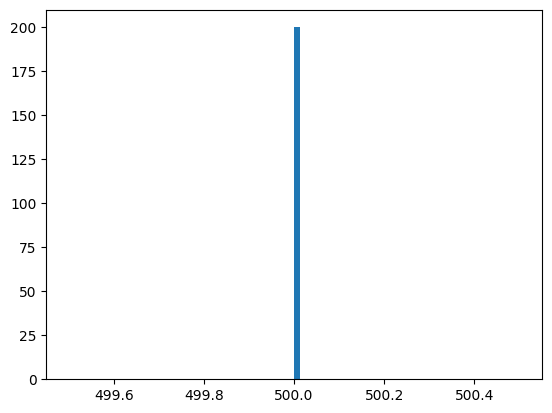

In [10]:
plt.hist(allspikes, bins=80);

In [11]:

if cfg.connect_ThVecStim_S1:

    # for post in Epops: 
    #     convergence_Th_S1['VPM_sTC']['L4_PC'] = 197
    #     convergence_Th_S1['VPM_sTC']['L4_SP'] = 197
    #     convergence_Th_S1['VPM_sTC']['L4_SS'] = 188
    #     convergence_Th_S1['VPM_sTC']['L4_INH'] = 116

    ## Connectivity rules
    synapsesperconnection_Th_S1 = 9.0
    for pre in ['VPM_sTC']:  #  
        if cfg.TC_S1[pre]:
            for post in Epops: 
                
                if 'L4_SS' in post:
                    conn_convergence = np.ceil(188/synapsesperconnection_Th_S1)
                else:
                    conn_convergence = np.ceil(197/synapsesperconnection_Th_S1)

                netParams.connParams['thal_'+pre+'_'+post] = { 
                    'preConds': {'pop': pre},  ####################################################
                    'postConds': {'pop': post},
                    'weight': 0.0002,   # synaptic weight 
                    'sec': 'all', # target postsyn section
                    'delay': 'defaultDelay',
                    'synsPerConn': int(synapsesperconnection_Th_S1),                     
                    'synMech': ESynMech_Th}  

                netParams.connParams['thal_'+pre+'_'+post]['convergence'] = conn_convergence 

                if 'L4_UPC' in post:
                    netParams.connParams['thal_'+pre+'_'+post]['weight'] = 0.0002

                if 'L4_TPC' in post:
                    netParams.connParams['thal_'+pre+'_'+post]['weight'] = 0.0005

            for post in Ipops: 
                
                conn_convergence = np.ceil(116/synapsesperconnection_Th_S1)

                netParams.connParams['thal_'+pre+'_'+post] = { 
                    'preConds': {'pop': pre},  ####################################################
                    'postConds': {'pop': post},
                    'weight': cfg.TC_S1_weightI,   # synaptic weight 
                    'sec': 'somatic', # target postsyn section
                    'delay': 'defaultDelay',
                    'synsPerConn': int(synapsesperconnection_Th_S1),                     
                    'synMech': ESynMech_Th}  

                netParams.connParams['thal_'+pre+'_'+post]['convergence'] = conn_convergence 

In [12]:
#------------------------------------------------------------------------------
# NetStim inputs to simulate Spontaneous synapses + background in S1 neurons - data from Rat
#------------------------------------------------------------------------------
# Spont and BG
netParams.synMechParams['AMPA'] = {'mod':'MyExp2SynBB', 'tau1': 0.2, 'tau2': 1.74, 'e': 0}
netParams.synMechParams['NMDA'] = {'mod': 'MyExp2SynNMDABB', 'tau1NMDA': 0.29, 'tau2NMDA': 43, 'e': 0}
netParams.synMechParams['GABAA'] = {'mod':'MyExp2SynBB', 'tau1': 0.2, 'tau2': 8.3, 'e': -80}
netParams.synMechParams['GABAB'] = {'mod':'MyExp2SynBB', 'tau1': 3.5, 'tau2': 260.9, 'e': -93} 
ESynMech = ['AMPA', 'NMDA']
ISynMech = ['GABAA', 'GABAB']

cfg.addStimSynS1 = True
cfg.Ipops = Ipops
cfg.Epops = Epops
cfg.rateStimI = 50.0 # Hz
cfg.rateStimE = 20.0
SourcesNumber = 10 # for each post Mtype - sec distribution

if cfg.addStimSynS1:      
    for post in cfg.Ipops + cfg.Epops:

        synperNeuron = 10
        ratespontaneous = cfg.rateStimI
        for qSnum in range(SourcesNumber):
            ratesdifferentiation = (0.8 + 0.4*qSnum/(SourcesNumber-1)) * (synperNeuron*ratespontaneous)/SourcesNumber
            netParams.stimSourceParams['StimSynS1_S_all_INH->' + post + '_' + str(qSnum)] = {'type': 'NetStim', 'rate': ratesdifferentiation, 'noise': 1.0}

        synperNeuron = 10
        ratespontaneous = cfg.rateStimE
        for qSnum in range(SourcesNumber):
            ratesdifferentiation = (0.8 + 0.4*qSnum/(SourcesNumber-1)) * (synperNeuron*ratespontaneous)/SourcesNumber
            netParams.stimSourceParams['StimSynS1_S_all_EXC->' + post + '_' + str(qSnum)] = {'type': 'NetStim', 'rate': ratesdifferentiation, 'noise': 1.0}
            
    #------------------------------------------------------------------------------
    for post in cfg.Epops+cfg.Ipops:
        for qSnum in range(SourcesNumber):
            netParams.stimTargetParams['StimSynS1_T_all_EXC->' + post + '_' + str(qSnum)] = {
                'source': 'StimSynS1_S_all_EXC->' + post + '_' + str(qSnum), 
                'synMech': 'AMPA', 
                'conds': {'cellType': post}, 
                'sec': 'all', 
                'weight': 0.5,
                'delay': 0.1}

    for post in cfg.Epops+cfg.Ipops:
        for qSnum in range(SourcesNumber):
            netParams.stimTargetParams['StimSynS1_T_all_INH->' + post + '_' + str(qSnum)] = {
                'source': 'StimSynS1_S_all_INH->' + post + '_' + str(qSnum), 
                'conds': {'cellType': post}, 
                'synMech': 'GABAA', 
                'sec': 'all', 
                'weight': 0.5,
                'delay': 0.1}


In [13]:
print(netParams.connParams.keys())

odict_keys(['E->E', 'E->E_B', 'E->I', 'I->E', 'thal_VPM_sTC_L4_SSC_cADpyr_3', 'thal_VPM_sTC_L4_SSC_cADpyr_4', 'thal_VPM_sTC_L4_SSC_cADpyr_5', 'thal_VPM_sTC_L4_TPC_cADpyr_6', 'thal_VPM_sTC_L4_TPC_cADpyr_7', 'thal_VPM_sTC_L4_TPC_cADpyr_8', 'thal_VPM_sTC_L4_UPC_cADpyr_9', 'thal_VPM_sTC_L4_UPC_cADpyr_10', 'thal_VPM_sTC_L4_UPC_cADpyr_11', 'thal_VPM_sTC_L4_BP_cNAC_0', 'thal_VPM_sTC_L4_BTC_cNAC_1', 'thal_VPM_sTC_L4_NBC_cNAC_2'])


In [14]:
sim.initialize(
    simConfig = cfg, 	
    netParams = netParams)  				# create network object and set cfg and net params
sim.net.createPops()               			# instantiate network populations
sim.net.createCells()              			# instantiate network cells based on defined populations
sim.net.connectCells()            			# create connections between cells based on params
sim.net.addStims() 							# add network stimulation
sim.setupRecording()              			# setup variables to record for each cell (spikes, V traces, etc)
sim.runSim()                      			# run parallel Neuron simulation  


Start time:  2025-03-25 17:39:58.846446

Creating network of 13 cell populations on 1 hosts...
  Number of cells on node 0: 212 
  Done; cell creation time = 0.51 s.
Making connections...
  Number of connections on node 0: 321 
  Number of synaptic contacts on node 0: 17262 
  Done; cell connection time = 1.43 s.
Adding stims...
  Number of stims on node 0: 240 
  Done; cell stims creation time = 0.17 s.
Recording 12 traces of 1 types on node 0
0.0s

Running simulation using NEURON for 600.0 ms...
0.1s
0.2s
0.3s
0.4s
0.5s
0.6s
  Done; run time = 255.10 s; real-time ratio: 0.00.


In [15]:
#   Number of connections on node 0: 770 
#   Number of synaptic contacts on node 0: 21235 

In [16]:
sim.gatherData();                  			# gather spiking data and cell info from each node
# sim.saveData()                    			# save params, cell info and sim output to file (pickle,mat,txt,etc)#
# sim.analysis.plotData()         			# plot spike raster etc
# sim.analysis.plotSpikeStats(timeRange=[300,900], figSize=(18,6))


Gathering data...
  Done; gather time = 0.61 s.

Analyzing...
  Cells: 212
  Connections: 333 (1.57 per cell)
  Synaptic contacts: 17502 (82.56 per cell)
  Spikes: 481 (3.78 Hz)
  Simulated time: 0.6 s; 1 workers
  Run time: 255.10 s
   L4_BP_cNAC_0 : 35.000 Hz
   L4_BTC_cNAC_1 : 33.333 Hz
   L4_NBC_cNAC_2 : 31.667 Hz
   L4_SSC_cADpyr_3 : 3.333 Hz
   L4_SSC_cADpyr_4 : 1.667 Hz
   L4_SSC_cADpyr_5 : 1.667 Hz
   L4_TPC_cADpyr_6 : 5.000 Hz
   L4_TPC_cADpyr_7 : 5.000 Hz
   L4_TPC_cADpyr_8 : 8.333 Hz
   L4_UPC_cADpyr_9 : 3.333 Hz
   L4_UPC_cADpyr_10 : 1.667 Hz
   L4_UPC_cADpyr_11 : 5.000 Hz
   VPM_sTC : 3.333 Hz


In [17]:
# for j in range(6):
#     sim.analysis.plotTraces(include= [ii for ii in range(5*j,5*j+5,1)], timeRange=[400,500], axis=False, overlay=True, oneFigPer='trace', figSize=(15,2.1));

Preparing spike data...
Plotting raster...


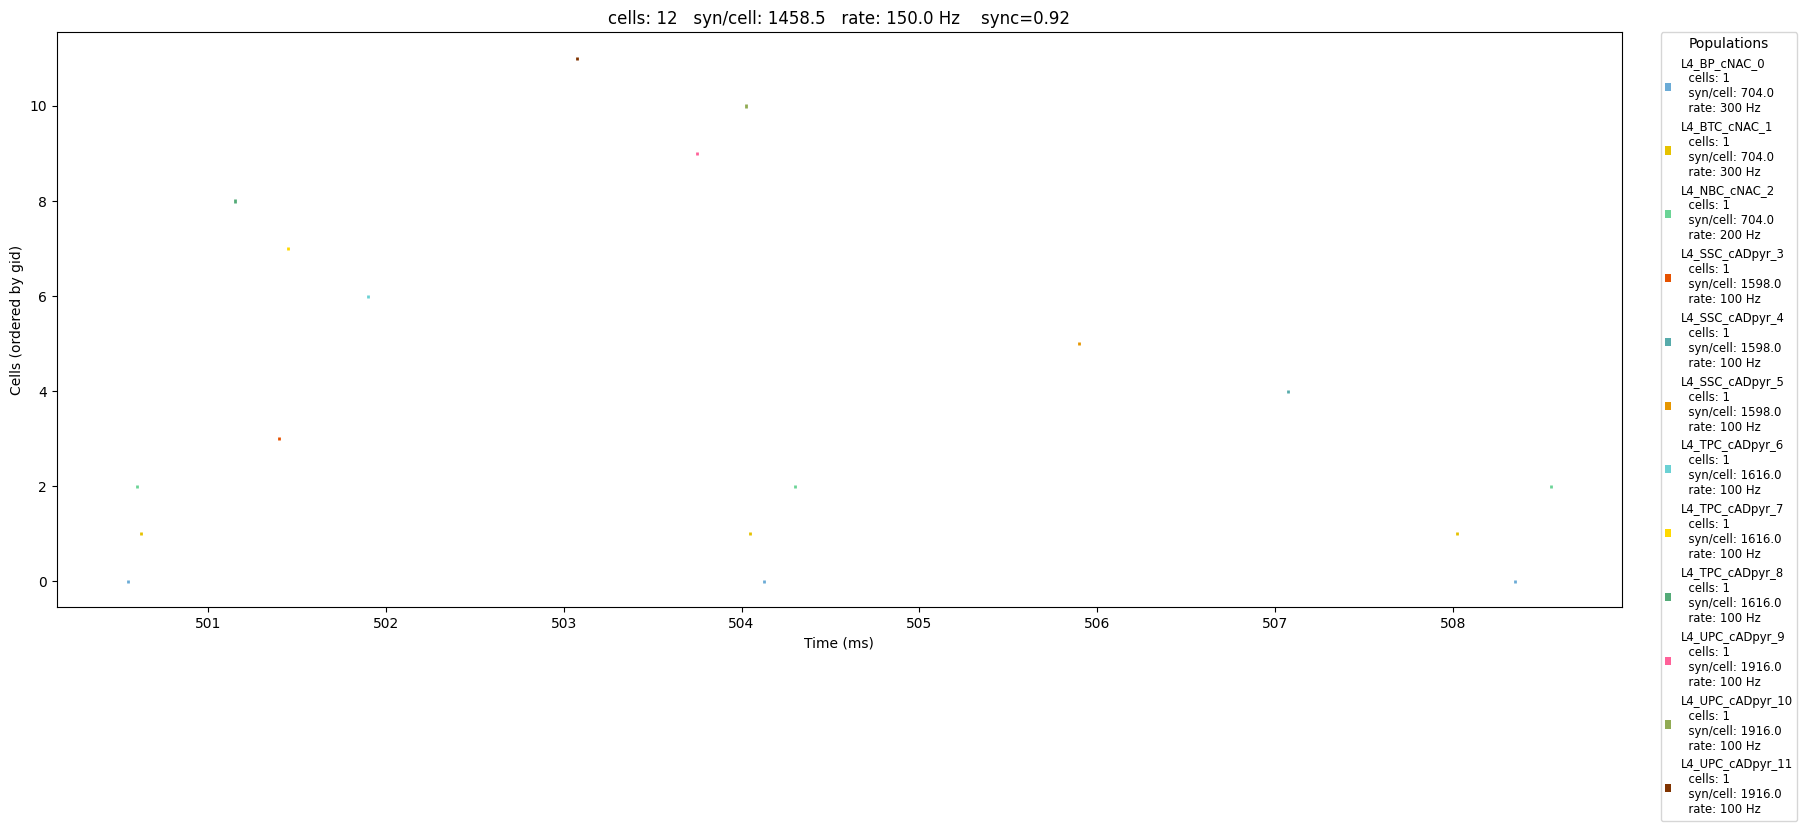

In [18]:
sim.analysis.plotRaster(include=Epops+Ipops, timeRange=[500,510], figSize=(18,8), popRates=True);

In [19]:
# sim.analysis.plotTraces(include=Ipops, timeRange=[399,520], overlay=True, oneFigPer='trace', figSize=(18,4));
# sim.analysis.plotTraces(include=Epops, timeRange=[399,520], overlay=True, oneFigPer='trace', figSize=(18,4));

Plotting recorded cell traces ... trace


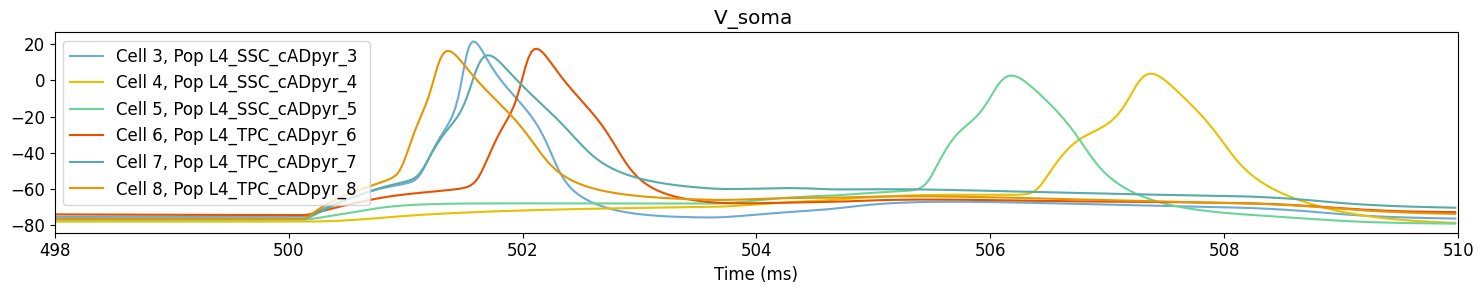

In [20]:
sim.analysis.plotTraces(include= [ii for ii in range(3,9)], timeRange=[498,510], axis=True, overlay=True, oneFigPer='trace', figSize=(15,3.1));

Plotting recorded cell traces ... trace


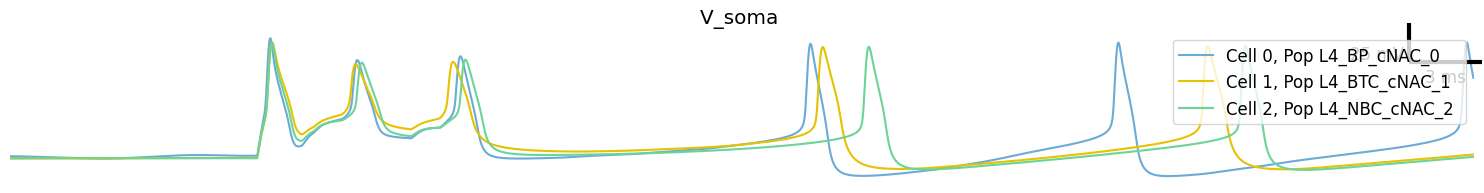

Plotting recorded cell traces ... trace


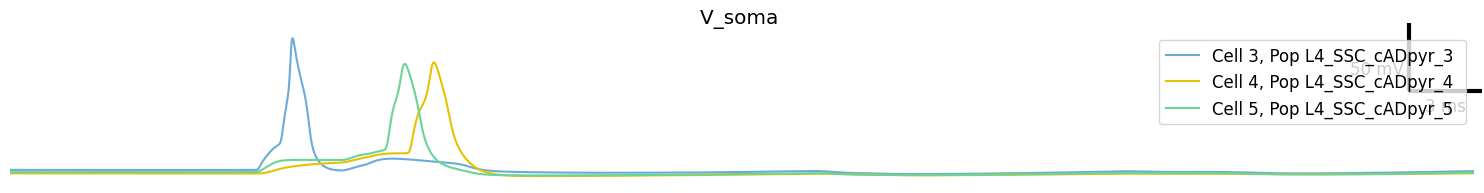

Plotting recorded cell traces ... trace


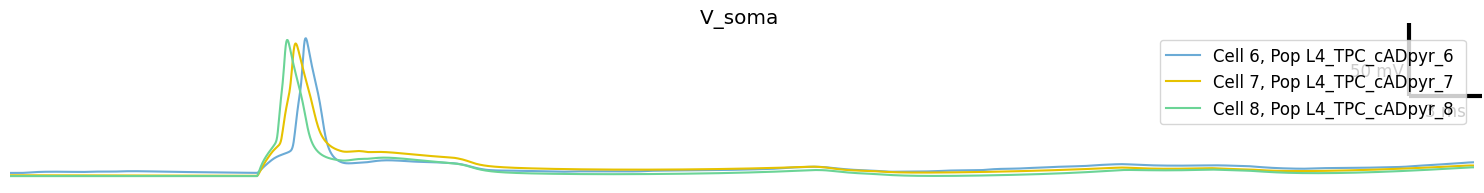

Plotting recorded cell traces ... trace


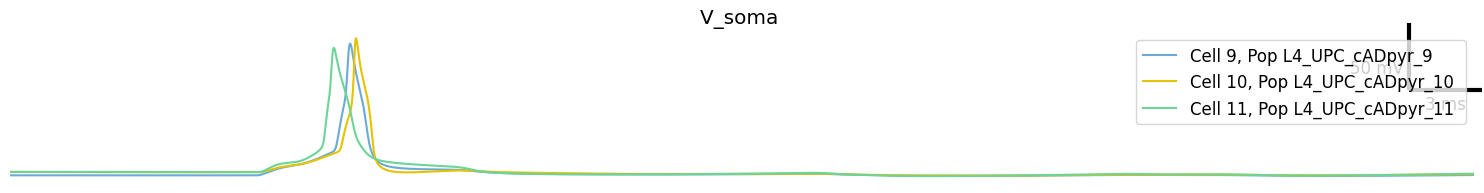

In [21]:
for j in range(4):
    sim.analysis.plotTraces(include= [ii for ii in range(3*j,3*j+3,1)], timeRange=[490,550], axis=False, overlay=True, oneFigPer='trace', figSize=(15,2.1));

Plotting recorded cell traces ... trace


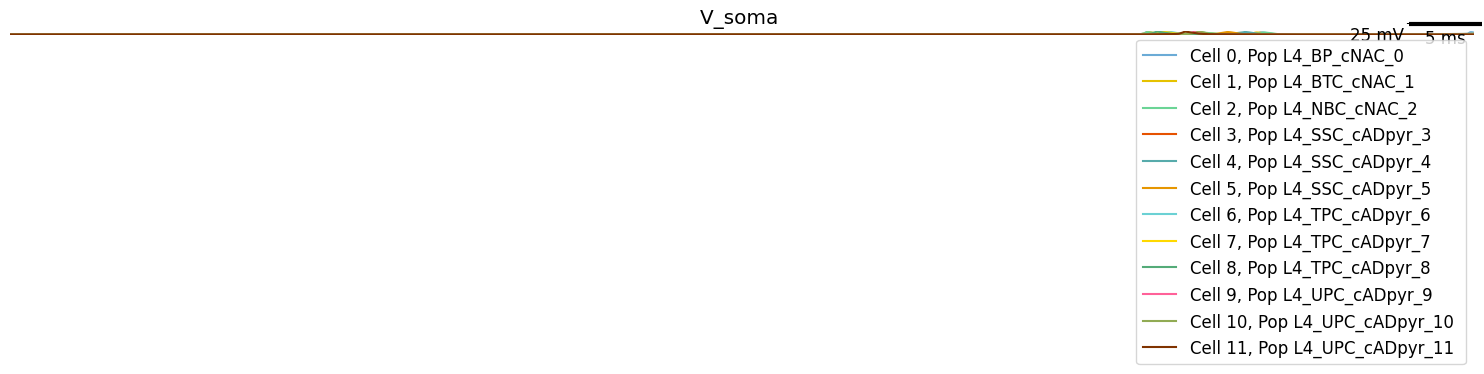

In [22]:
sim.analysis.plotTraces(include= [ii for ii in range(0,12)], timeRange=[423,523], ylim=[-80,20], axis=False, overlay=True, oneFigPer='trace', figSize=(15,2.1));
# sim.analysis.plotTraces(include= [ii for ii in range(15,30,5)], timeRange=[423,523], ylim=[-80,20], axis=False, overlay=True, oneFigPer='trace', figSize=(15,2.1));
# sim.analysis.plotTraces(timeRange=[290,320], overlay=False, oneFigPer='trace', figSize=(18,36));

pyNeuroML >>> WARNING - No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


Plotting recorded cell traces ... trace


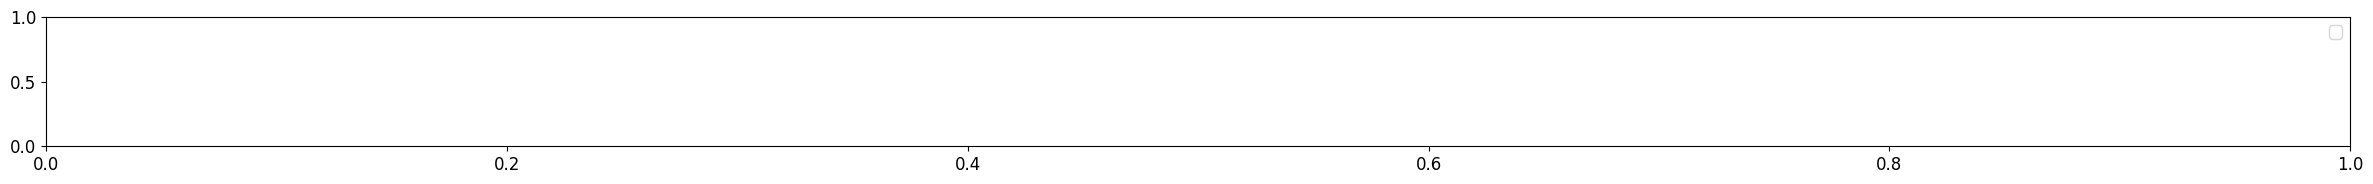

Preparing LFP data...
Plotting LFP time series...
Plotting recorded cell traces ... trace


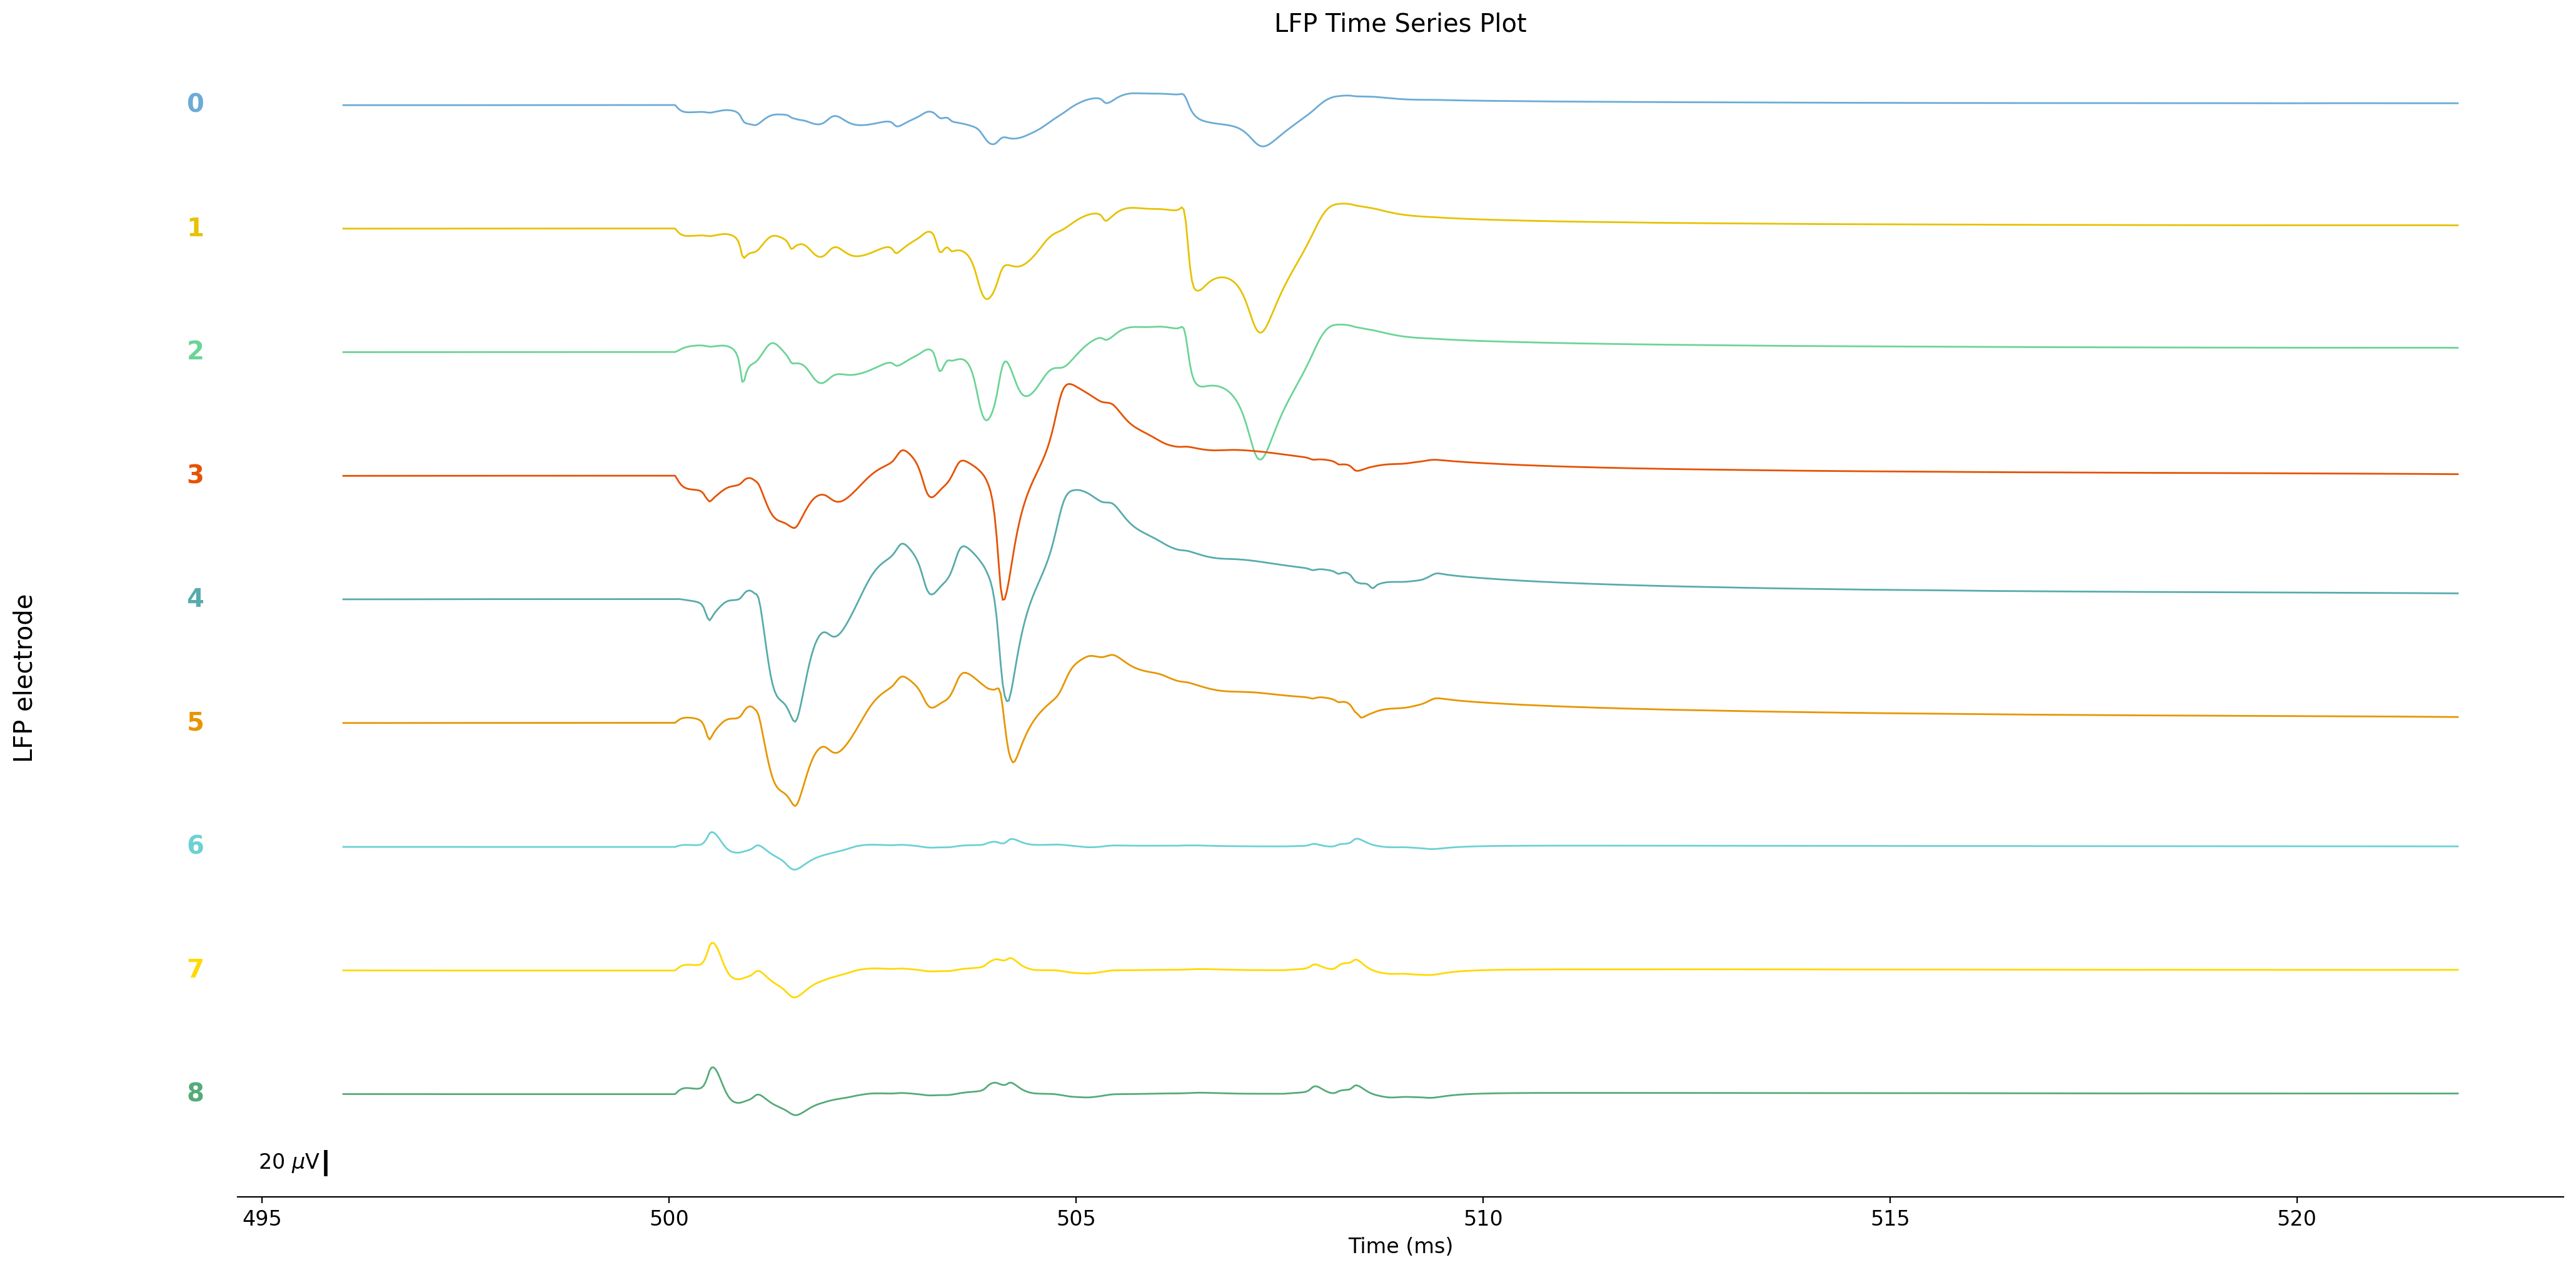

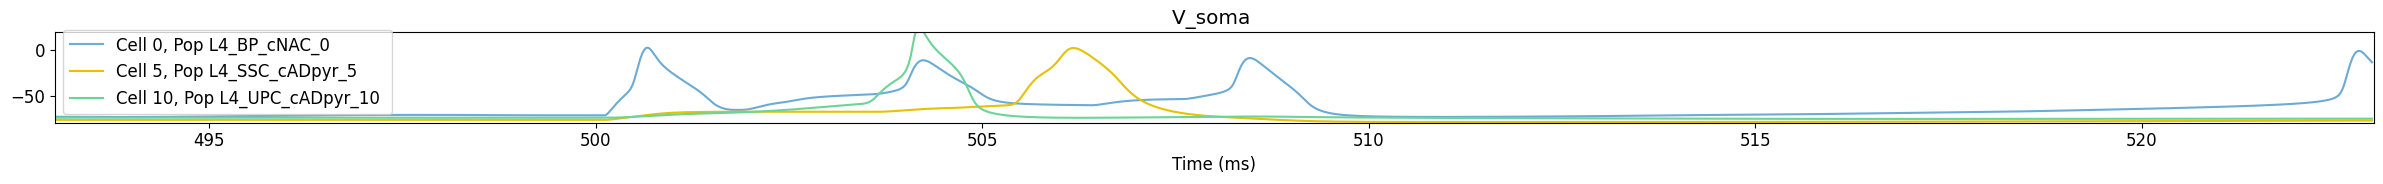

In [23]:
sim.analysis.plotTraces(include= [ii for ii in range(15,30,5)], timeRange=[493,523], ylim=[-80,20], axis=True, overlay=True, oneFigPer='trace', figSize=(24,2.0));
sim.analysis.plotLFP(electrodes=[ii for ii in range(len(cfg.recordLFP))], timeRange=[496,522], plots=['timeSeries'], figSize=(24,12.0))
sim.analysis.plotTraces(include= [ii for ii in range(0,15,5)], timeRange=[493,523], ylim=[-80,20], axis=True, overlay=True, oneFigPer='trace', figSize=(24,2.0));


Plotting LFP electrode locations...
Plotting 3D cell shape ...


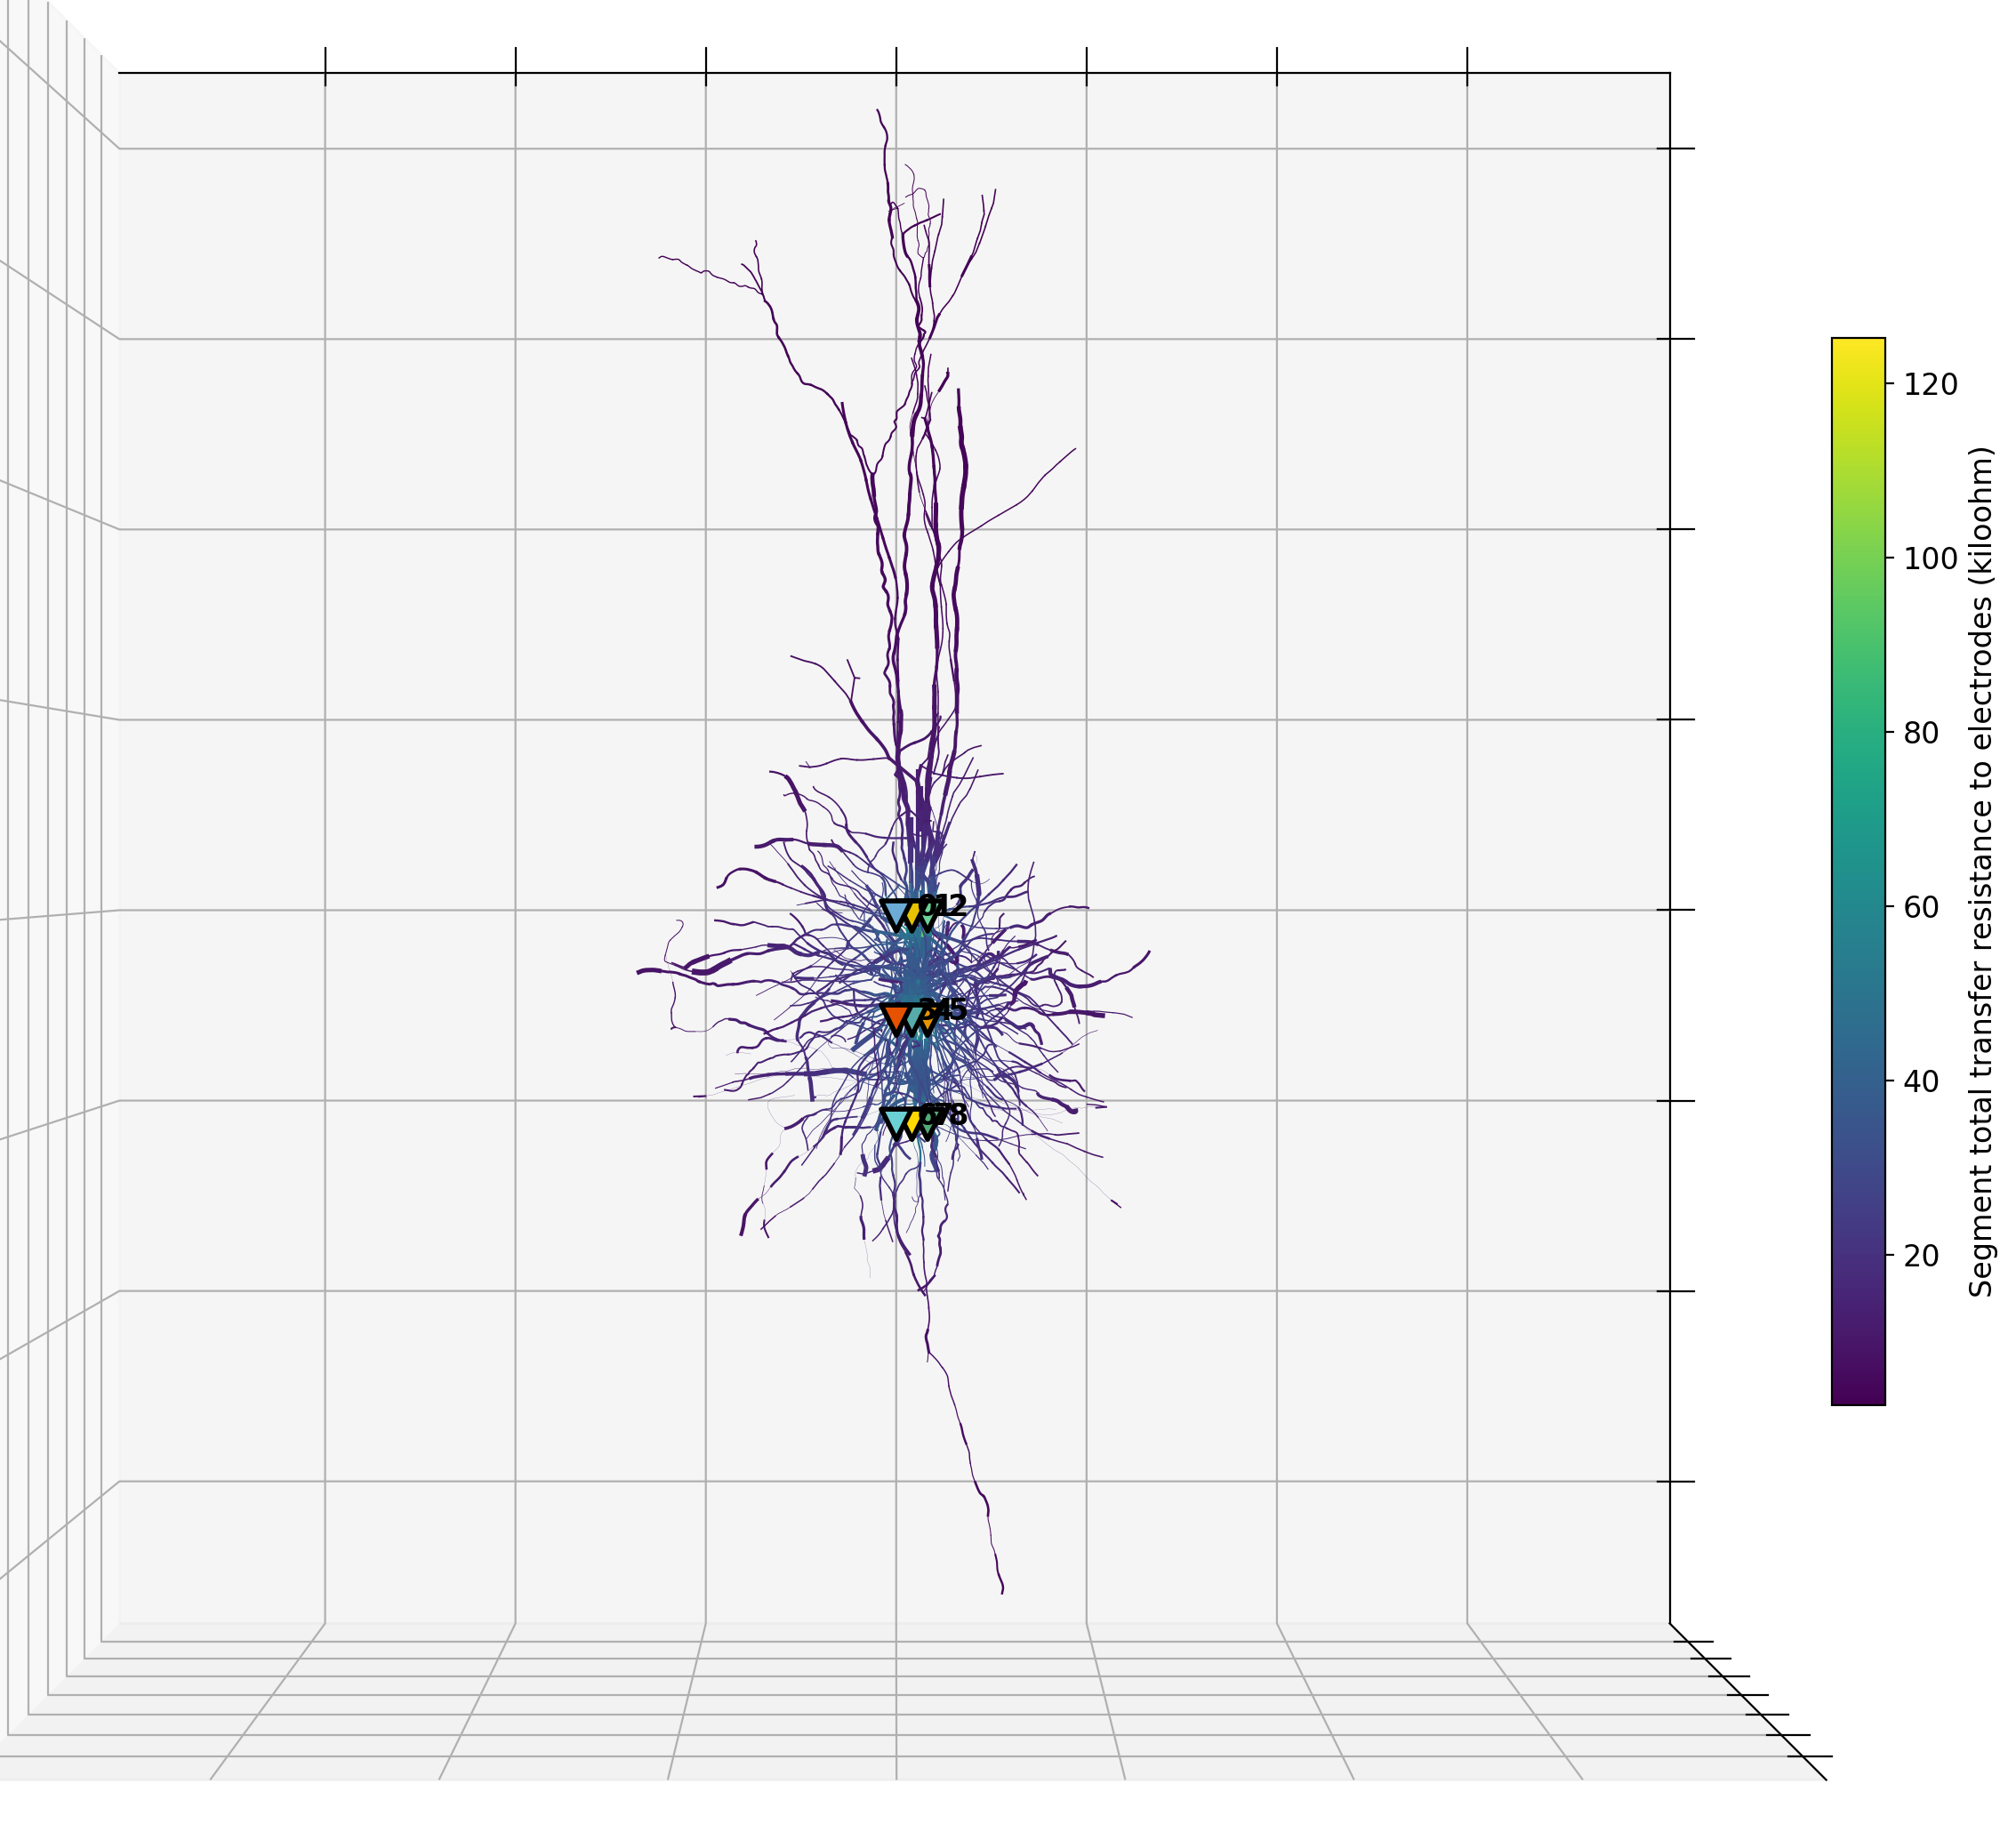

In [24]:
sim.analysis.plotLFP(electrodes=[3], timeRange=[299,304], plots=['locations'], figSize=(12,12.0))

Preparing LFP data...
Plotting LFP time series...


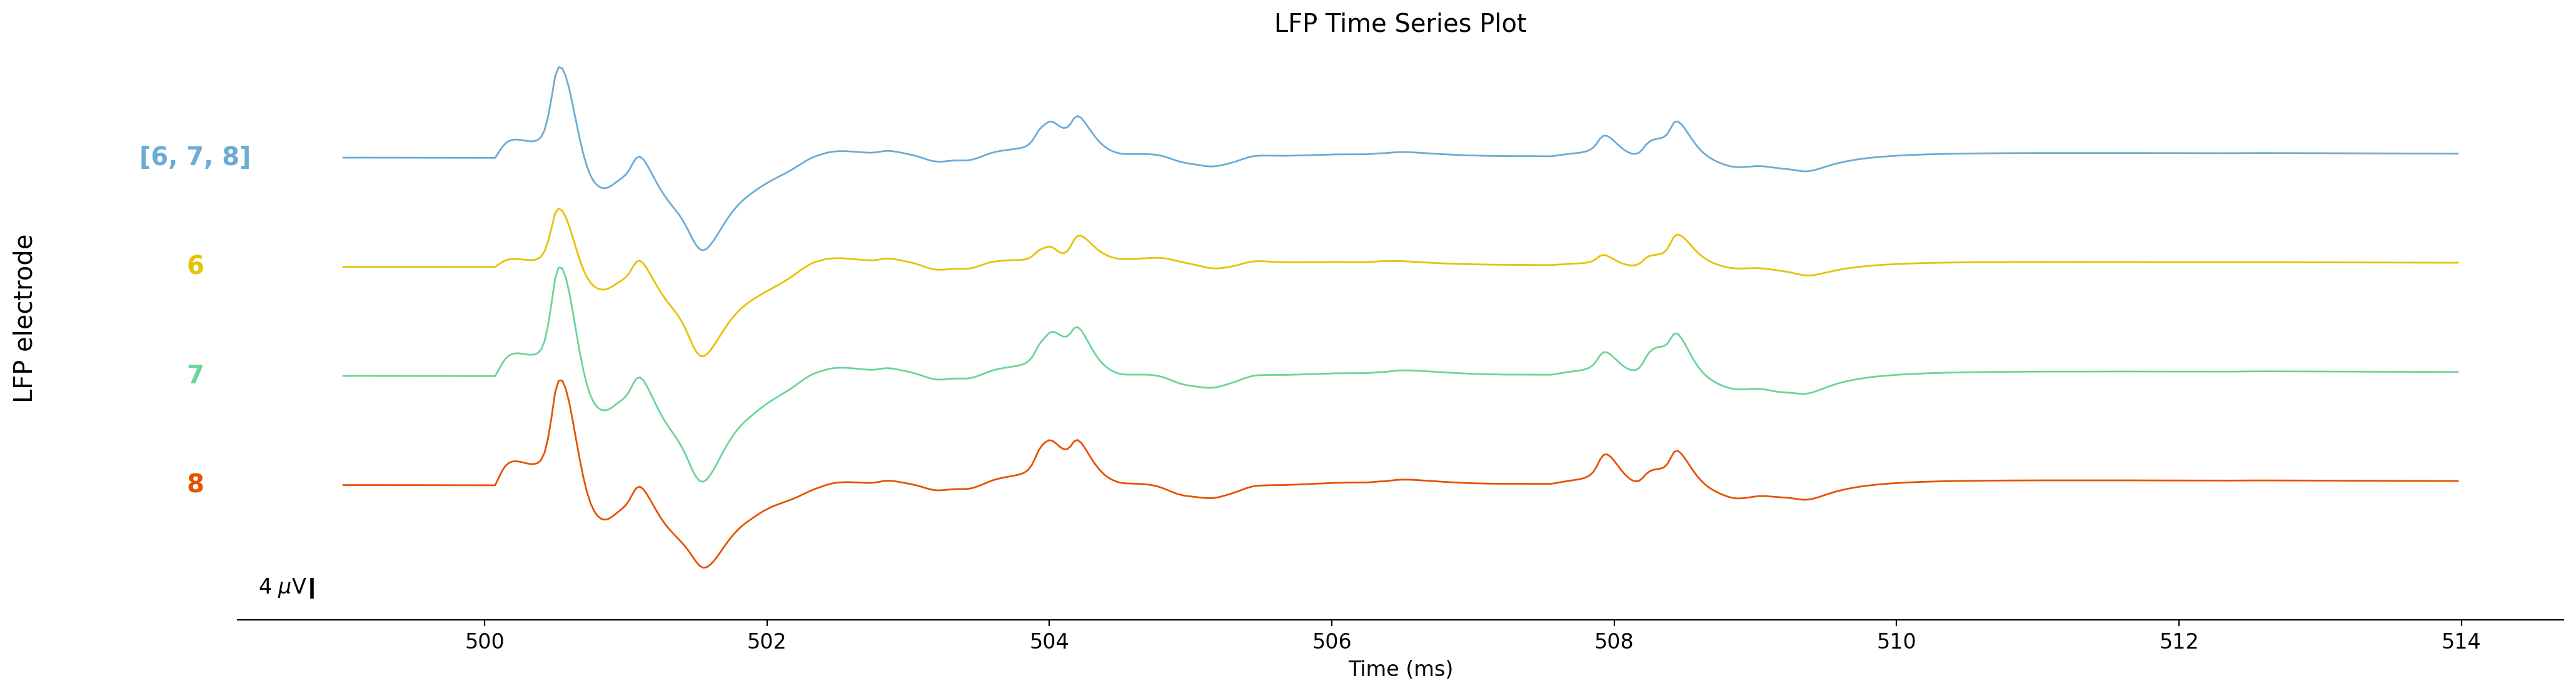

In [25]:
sim.analysis.plotLFP(electrodes=[[6,7,8], 6,7,8], timeRange=[499,514], plots=['timeSeries'], figSize=(24,6.0))

Plotting 3D cell shape ...
Plotting 3D cell shape ...
Plotting 3D cell shape ...
Plotting 3D cell shape ...
Plotting 3D cell shape ...


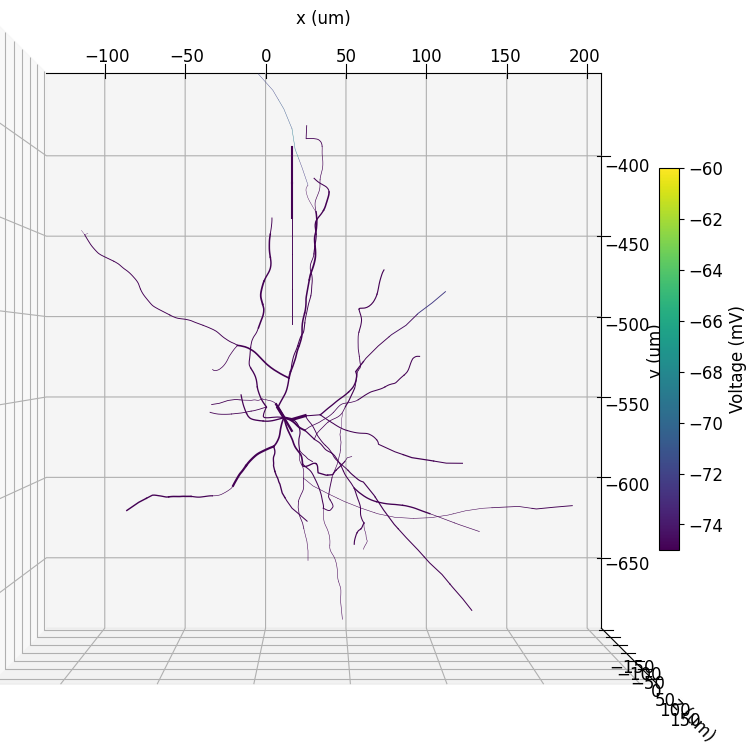

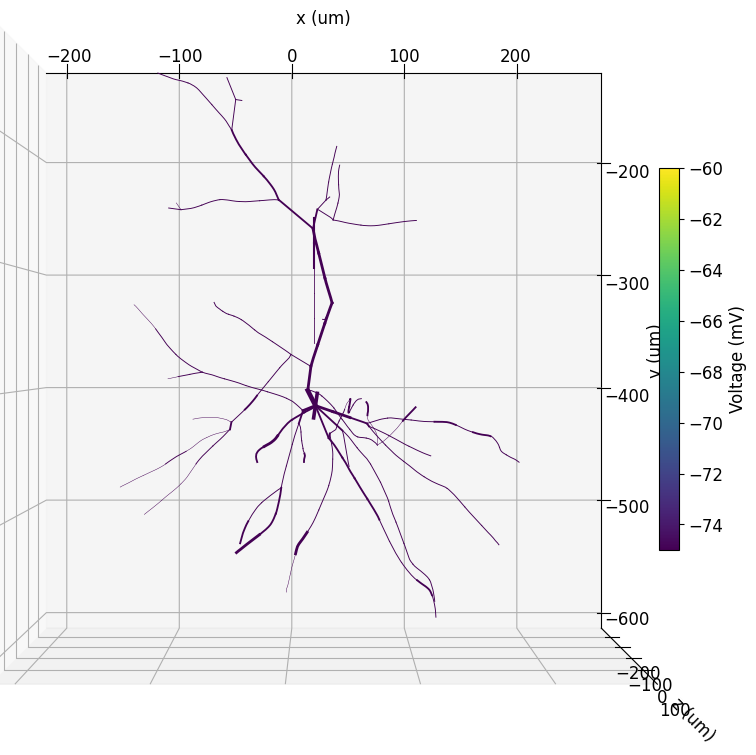

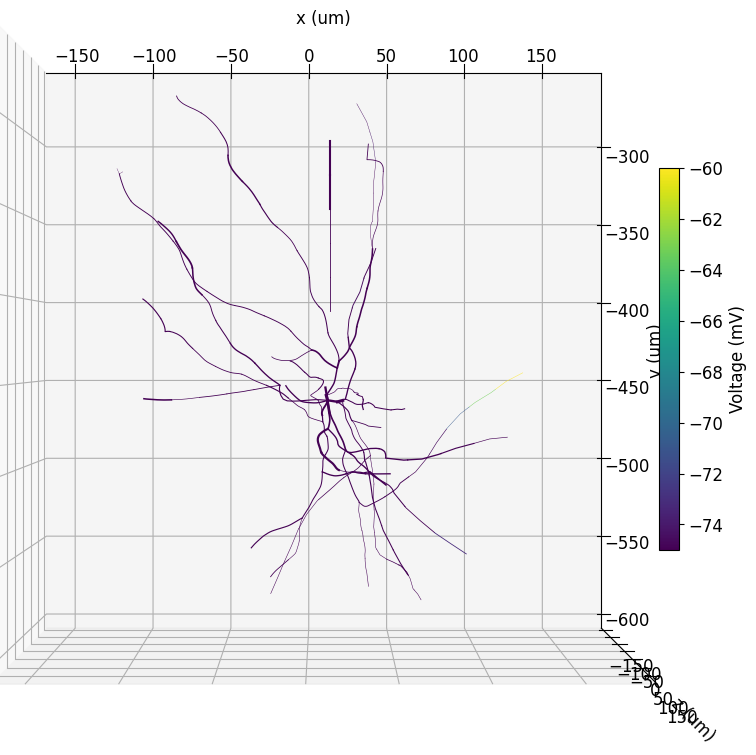

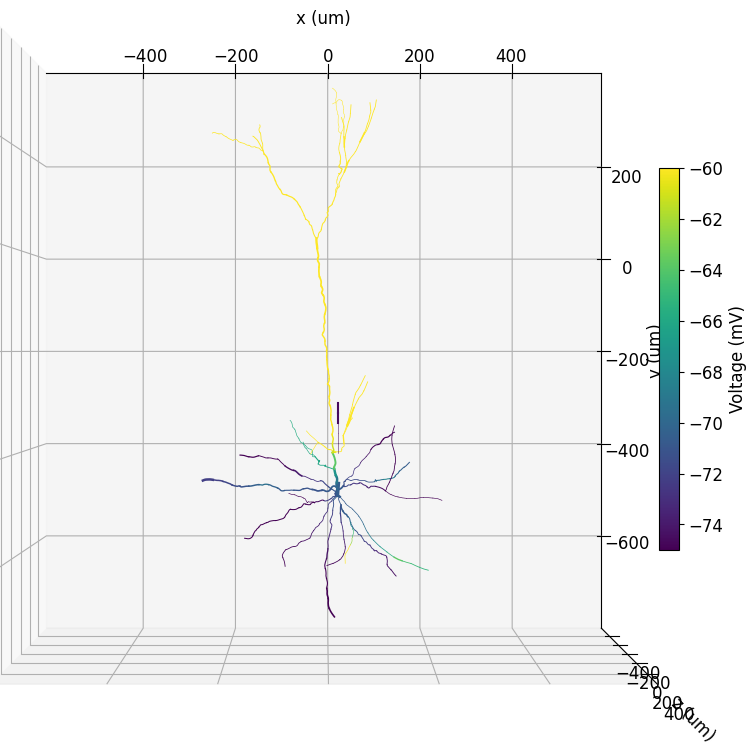

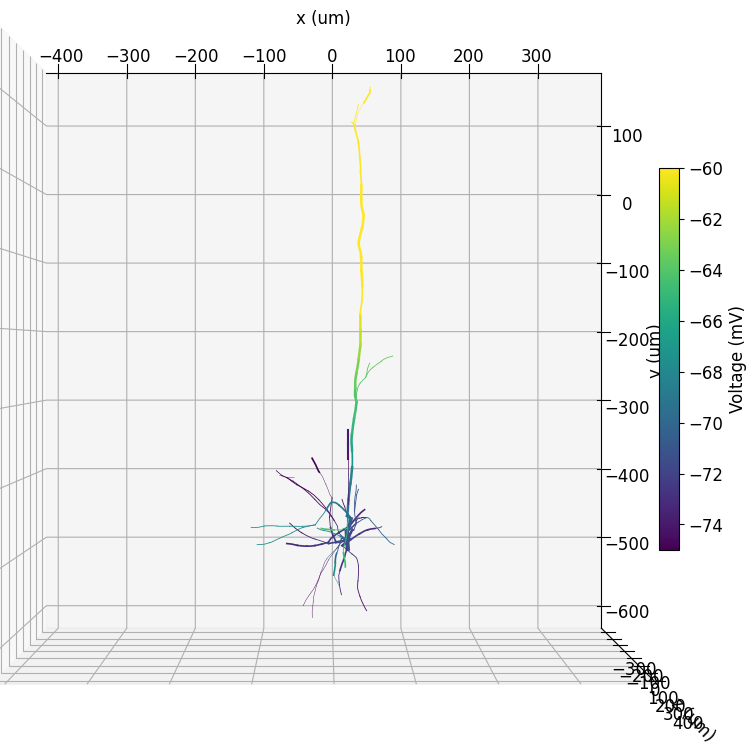

In [30]:
for ii in range(3,8,1):    
    sim.analysis.plotShape(includePre= [ii], includePost= [ii], 
        includeAxon=False, showSyns=False, showElectrodes=False,
        cvar= 'voltage', dist=0.6, elev=90, azim=-90, 
        axisLabels=True, synStyle='o', 
        clim= [-75, -60], showFig=False, synSize=2, saveFig=False, figSize=(8,8))

In [27]:
# sim.analysis.plotTraces(include= [ii for ii in range(9)], timeRange=[300,320], overlay=False, oneFigPer='trace', figSize=(6,36));
# sim.analysis.plotTraces(timeRange=[290,320], overlay=False, oneFigPer='trace', figSize=(6,18));

Plotting 2D representation of network cell locations and connections...


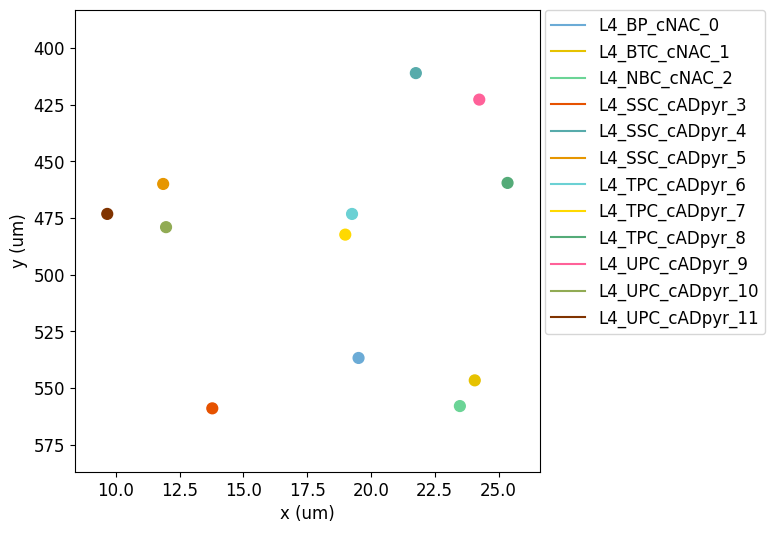

Plotting 2D representation of network cell locations and connections...


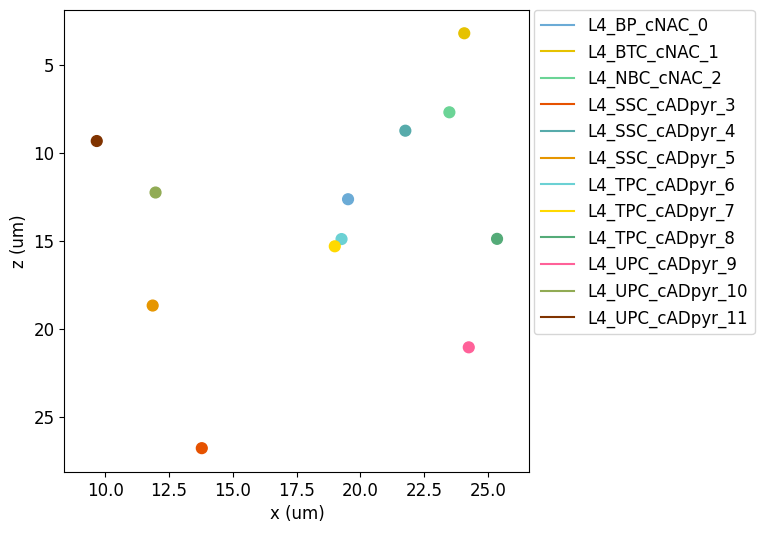

In [28]:
sim.analysis.plot2Dnet(include=Epops+Ipops, showConns=False, view='xy', figSize=(6,6));
sim.analysis.plot2Dnet(include=Epops+Ipops, showConns=False, view='xz', figSize=(6,6));

Plotting 3D cell shape ...


(<Figure size 800x800 with 2 Axes>, {})

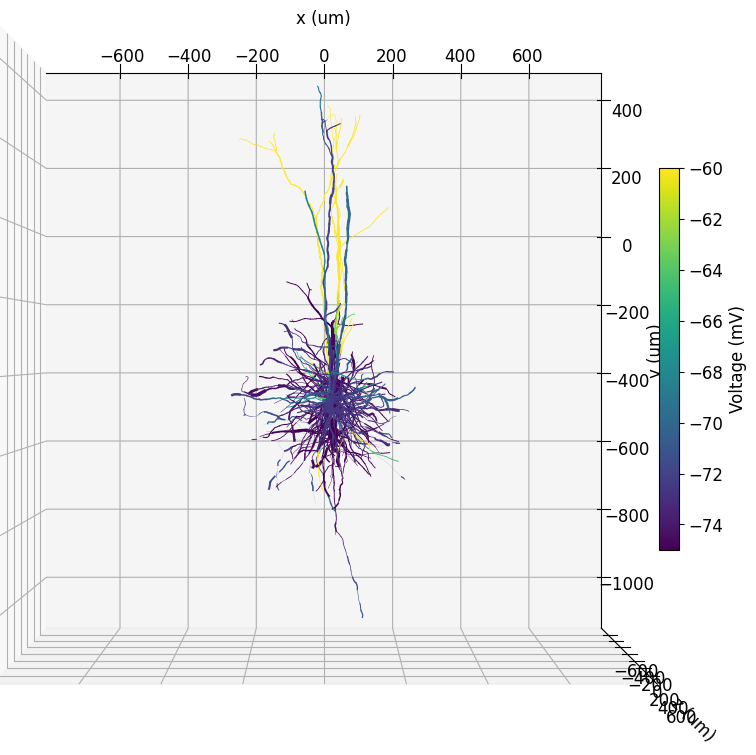

In [31]:
sim.analysis.plotShape(includePre= [ii for ii in range(0,12,1)], includePost= [ii for ii in range(0,12,1)], 
        includeAxon=False, showSyns=False, showElectrodes=False,
        cvar= 'voltage', dist=0.6, elev=90, azim=-90, 
        axisLabels=True, synStyle='o', 
        clim= [-75, -60], showFig=False, synSize=2, saveFig=False, figSize=(8,8))